In [1]:
import pandas as pd

df=pd.read_csv('news.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup style
sns.set(style="whitegrid")
%matplotlib inline 

In [3]:
# 5 baris pertama
df.head()

# Dimensi data
print("Shape:", df.shape)

# Info umum kolom
df.info()

# Tipe data dan missing value
print(df.isnull().sum())


Shape: (6335, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


In [4]:
# Statistik ringkasan untuk kolom numerik
df.describe()

# Statistik kolom kategorik
df.describe(include='object')


,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


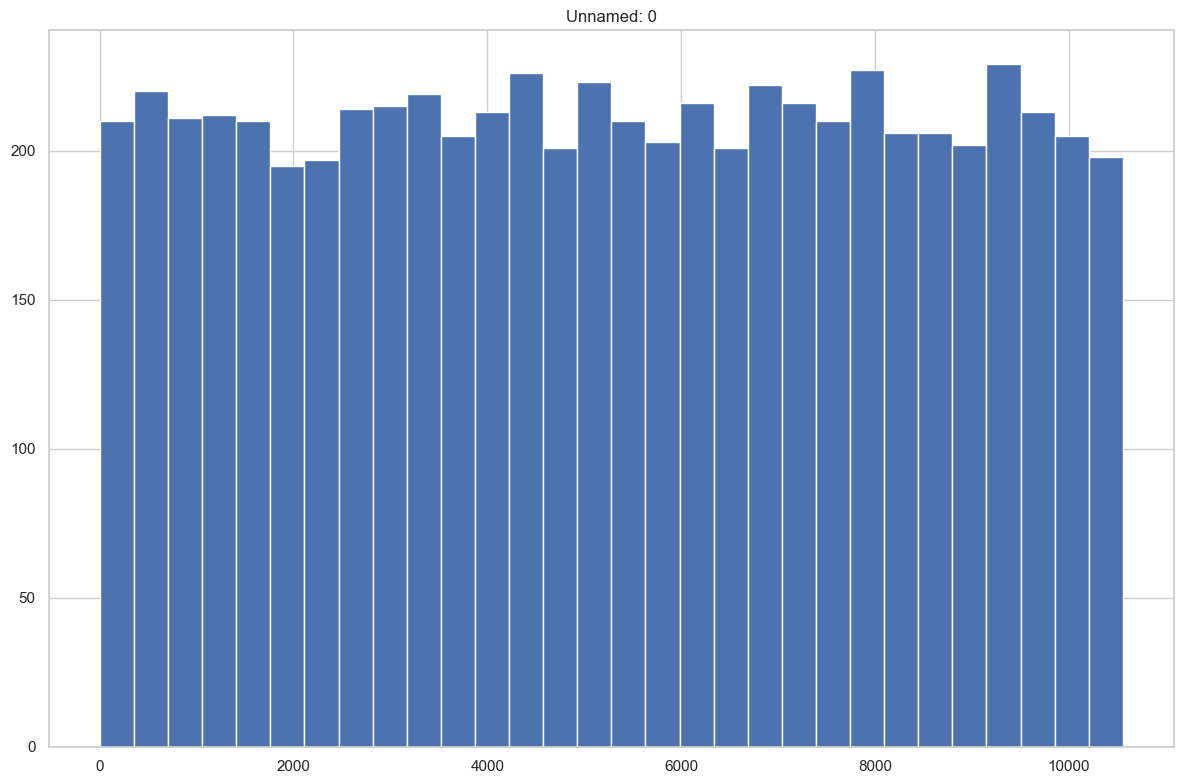

In [5]:
df.hist(bins=30, figsize=(12,8))
plt.tight_layout()


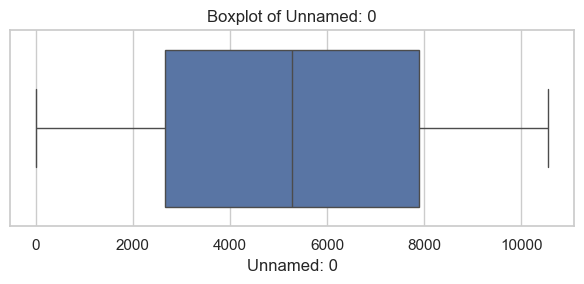

In [6]:
# Boxplot untuk semua kolom numerik
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


Text(0.5, 1.0, 'Missing Values')

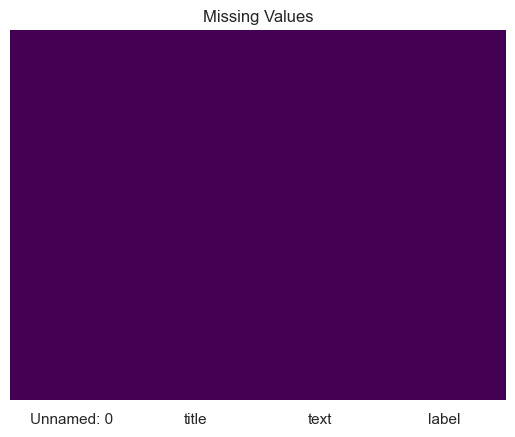

In [7]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values")


In [8]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


C:\Users\I Putu Nanda Aditya\AppData\Local\Temp\ipykernel_36136\472907021.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


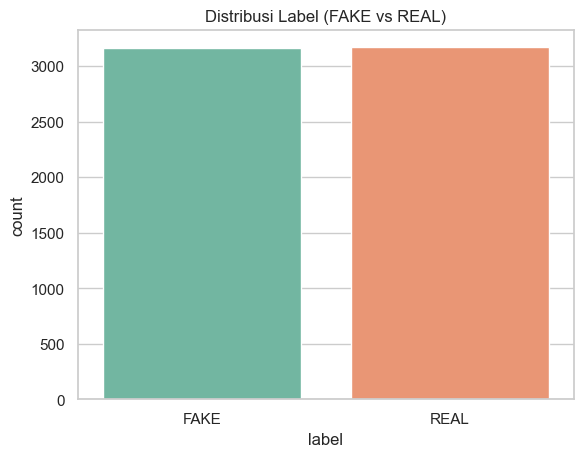

In [9]:
sns.countplot(data=df, x='label', palette='Set2')
plt.title('Distribusi Label (FAKE vs REAL)')
plt.show()


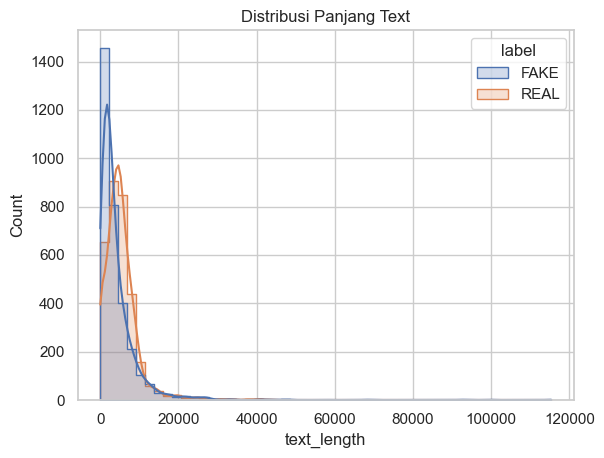

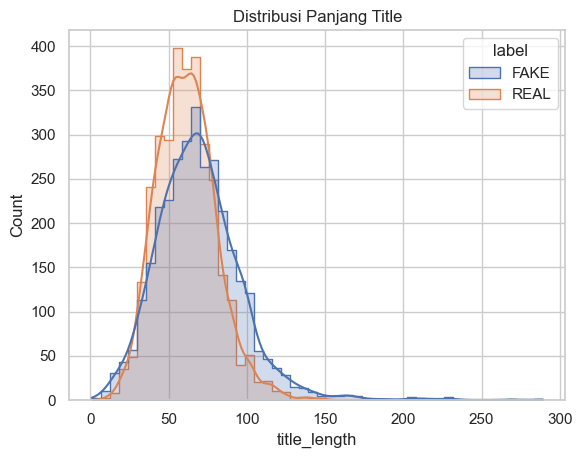

In [10]:
# Tambahkan kolom panjang
df['text_length'] = df['text'].apply(len)
df['title_length'] = df['title'].apply(len)

# Plot distribusi panjang teks
sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True, element='step')
plt.title('Distribusi Panjang Text')
plt.show()

sns.histplot(data=df, x='title_length', hue='label', bins=50, kde=True, element='step')
plt.title('Distribusi Panjang Title')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (text) dan label (FAKE/REAL)
X = df['text']
y = df['label']

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Buat TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform text menjadi TF-IDF matrix
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi dan latih model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prediksi
y_pred = model.predict(X_test_tfidf)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9155485398579322

Classification Report:
               precision    recall  f1-score   support

        FAKE       0.90      0.93      0.92       628
        REAL       0.93      0.90      0.91       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



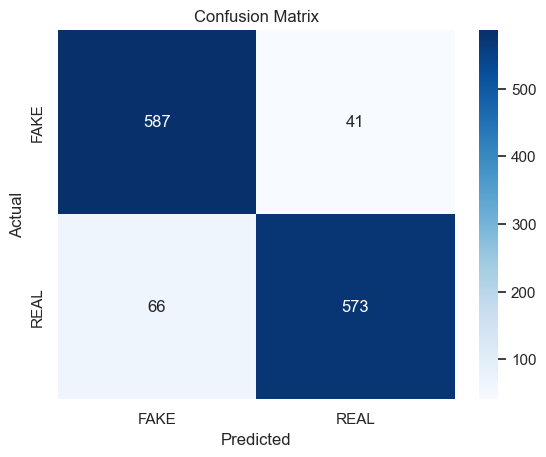

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [17]:
def predict_news(text):
    vec = vectorizer.transform([text])
    prediction = model.predict(vec)[0]
    print("Prediksi:", prediction)

# Contoh uji coba
predict_news("Jokowi hamil")
predict_news("BREAKING: NASA confirms aliens have landed on Mars.")


Prediksi: FAKE
Prediksi: FAKE
